In [2]:
!pip install py3langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 kB 9.5 MB/s eta 0:00:00


In [1]:
!gdown https://drive.google.com/u/0/uc?id=1K6uMzI714qP9VW1_iNNmE9OUiYgQiDMo&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1K6uMzI714qP9VW1_iNNmE9OUiYgQiDMo
To: /content/restaurant_reviews.csv
100% 3.59M/3.59M [00:00<00:00, 25.3MB/s]


In [42]:
import pandas as pd
import nltk
import py3langid as langid
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.probability import FreqDist
import pickle

import numpy as np

In [4]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("names")
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [5]:
stopwords = nltk.corpus.stopwords.words("english")
names = nltk.corpus.names.words()

In [149]:
df = pd.read_csv("restaurant_reviews.csv")
df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                                                 ...    ...   
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures    7514  
0           1 Review , 2 Followers  5/25/2019 15:54         0  2447.0  
1          3 Reviews , 2 Followers  5/25/2019 14:20         0     NaN  
2          2 Reviews , 3 Followers  5/24/2019 22:54         0     NaN  
3            1 Review , 1 Follower  5/24/2019 22:11         0     NaN  
4          3 Reviews , 2 Followers  5/24/2019 21:37         0     NaN  
...                            ...              ...       ...     ...  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0     NaN  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0     NaN  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3     NaN  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0     NaN  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6     NaN  

[10000 rows x 8 columns]

In [150]:
df = df[df["Rating"] != "Like"]

In [151]:
df = df[["Review", "Rating", "Time"]]

In [152]:
df["Rating"] = df["Rating"].astype("float64")

In [153]:
df = df[~df["Review"].isna()]

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  9954 non-null   object 
 1   Rating  9954 non-null   float64
 2   Time    9954 non-null   object 
dtypes: float64(1), object(2)
memory usage: 311.1+ KB


<Axes: >

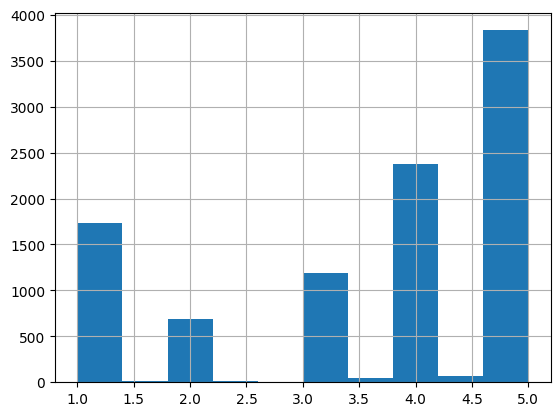

In [18]:
df["Rating"].hist()

In [158]:
df["Time"] = pd.to_datetime(df["Time"])

In [163]:
df["Hour"] = df["Time"].dt.hour

In [166]:
df["Weekday"] = df["Time"].dt.weekday

In [171]:
df["Month"] = df["Time"].dt.month

In [172]:
df

Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                    Time  Hour  Weekday  Month  
0    2019-05-25 15:54:00    15        5      5  
1    2019-05-25 14:20:00    14        5      5  
2    2019-05-24 22:54:00    22        4      5  
3    2019-05-24 22:11:00    22        4      5  
4    2019-05-24 21:37:00    21        4      5  
...                  ...   ...      ...    ...  
9995 2016-06-05 00:08:00     0        6      6  
9996 2016-06-04 22:01:00    22        5      6  
9997 2016-06-03 10:37:00    10        4      6  
9998 2016-05-31 17:22:00    17        1      5  
9999 2016-05-31 16:41:00    16        1      5  

[9954 rows x 6 columns]

<Axes: title={'center': 'Rating'}, xlabel='Month'>

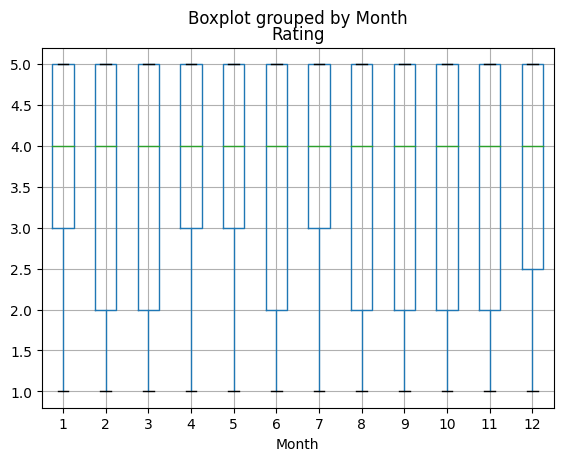

In [173]:
df.boxplot("Rating", by="Month")

In [26]:
df["Language"] = df["Review"].apply(lambda x: langid.classify(x)[0])
df

Review  Rating Language
0     The ambience was good, food was quite good . h...     5.0       en
1     Ambience is too good for a pleasant evening. S...     5.0       en
2     A must try.. great food great ambience. Thnx f...     5.0       en
3     Soumen das and Arun was a great guy. Only beca...     5.0       en
4     Food is good.we ordered Kodi drumsticks and ba...     5.0       en
...                                                 ...     ...      ...
9995  Madhumathi Mahajan Well to start with nice cou...     3.0       en
9996  This place has never disappointed us.. The foo...     4.5       en
9997  Bad rating is mainly because of "Chicken Bone ...     1.5       en
9998  I personally love and prefer Chinese Food. Had...     4.0       en
9999  Checked in here to try some delicious chinese ...     3.5       en

[9954 rows x 3 columns]

In [29]:
df = df[df["Language"] == "en"]
df

Review  Rating Language
0     The ambience was good, food was quite good . h...     5.0       en
1     Ambience is too good for a pleasant evening. S...     5.0       en
2     A must try.. great food great ambience. Thnx f...     5.0       en
3     Soumen das and Arun was a great guy. Only beca...     5.0       en
4     Food is good.we ordered Kodi drumsticks and ba...     5.0       en
...                                                 ...     ...      ...
9995  Madhumathi Mahajan Well to start with nice cou...     3.0       en
9996  This place has never disappointed us.. The foo...     4.5       en
9997  Bad rating is mainly because of "Chicken Bone ...     1.5       en
9998  I personally love and prefer Chinese Food. Had...     4.0       en
9999  Checked in here to try some delicious chinese ...     3.5       en

[9686 rows x 3 columns]

In [65]:
df["Rank"] = df["Rating"].rank(method="first")

<ipython-input-65-5da24e481ffc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rank"] = df["Rating"].rank(method="first")


In [77]:
df["Quartile"] = pd.qcut(df["Rank"], 4, labels=[1, 2, 3, 4])

<ipython-input-77-3c02757f8a48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Quartile"] = pd.qcut(df["Rank"], 4, labels=[1, 2, 3, 4])


In [30]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [36]:
tokens_unwanted = []

In [37]:
def get_tokens(text):

  tokens = word_tokenize(text)
  cleaned_tokens = []

  for token in tokens:
    if token in stopwords: continue
    if token in names: continue
    if not token.isalpha(): continue
    if token in tokens_unwanted: continue
    token = token.lower()
    token = lemmatizer.lemmatize(token)
    cleaned_tokens.append(token)

  cleaned_tokens = [i[0] for i in pos_tag(cleaned_tokens) if i[1][:2] in ["NN", "VB", "RB", "JJ"]]

  return cleaned_tokens


In [87]:
full_vocabulary = []
vocabulary = {category:[] for category in df["Quartile"].unique()}
for _, row in df.iterrows():
  tokens = get_tokens(row["Review"])
  full_vocabulary += tokens
  vocabulary[row["Quartile"]] += tokens

In [91]:
FreqDist(full_vocabulary).most_common(20)

[('good', 7077),
 ('i', 6954),
 ('food', 6525),
 ('place', 5970),
 ('service', 3181),
 ('chicken', 3065),
 ('taste', 2380),
 ('ordered', 2168),
 ('time', 1999),
 ('ambience', 1993),
 ('great', 1949),
 ('really', 1661),
 ('also', 1584),
 ('nice', 1457),
 ('restaurant', 1436),
 ('best', 1428),
 ('staff', 1390),
 ('biryani', 1325),
 ('order', 1294),
 ('try', 1277)]

In [94]:
FreqDist(vocabulary[4]).most_common(20)

[('good', 1687),
 ('food', 1505),
 ('place', 1418),
 ('i', 1369),
 ('service', 690),
 ('great', 609),
 ('chicken', 585),
 ('best', 527),
 ('taste', 481),
 ('ambience', 469),
 ('time', 454),
 ('really', 437),
 ('amazing', 414),
 ('nice', 407),
 ('staff', 407),
 ('visit', 370),
 ('awesome', 343),
 ('try', 342),
 ('also', 334),
 ('well', 279)]

In [101]:
most_common_tokens = set()

for quartile in df["Quartile"].unique():
  most_common_quartile_tokens = [i[0] for i in FreqDist(vocabulary[quartile]).most_common(250)]
  most_common_tokens = most_common_tokens.union(set(most_common_quartile_tokens))

In [102]:
print(len(list(most_common_tokens)))

387


In [128]:
with open(f"most_common.tokens", "wb") as file:
  pickle.dump(most_common_tokens, file)

In [103]:
def get_tokens_training(text):

  tokens = word_tokenize(text)
  cleaned_tokens = []

  for token in tokens:
    if token in stopwords: continue
    if token in names: continue
    if not token.isalpha(): continue
    token = token.lower()
    token = lemmatizer.lemmatize(token)
    if token not in most_common_tokens: continue
    cleaned_tokens.append(token)

  return " ".join(cleaned_tokens)


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
df = df.reset_index(drop=True)

In [106]:
df["Tokens String"] = df["Review"].apply(lambda x: get_tokens_training(x))
df

Review  Rating Language  \
0     The ambience was good, food was quite good . h...     5.0       en   
1     Ambience is too good for a pleasant evening. S...     5.0       en   
2     A must try.. great food great ambience. Thnx f...     5.0       en   
3     Soumen das and Arun was a great guy. Only beca...     5.0       en   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0       en   
...                                                 ...     ...      ...   
9681  Madhumathi Mahajan Well to start with nice cou...     3.0       en   
9682  This place has never disappointed us.. The foo...     4.5       en   
9683  Bad rating is mainly because of "Chicken Bone ...     1.5       en   
9684  I personally love and prefer Chinese Food. Had...     4.0       en   
9685  Checked in here to try some delicious chinese ...     3.5       en   

        Rank Quartile                                      Tokens String  
0     6042.0        3  ambience good food quite good lunch cost good ...  
1     6043.0        3  ambience good evening service food good good e...  
2     6044.0        3  try great food great ambience service pasta al...  
3     6045.0        3      great guy good food course i like visit place  
4     6046.0        3  food ordered mutton biryani good thanks served...  
...      ...      ...                                                ...  
9681  3570.0        2  well nice courteous staff excellent serving ti...  
9682  6041.0        3  place never disappointed u food courteous staf...  
9683  1699.0        1  bad rating chicken found veg food vegetarian c...  
9684  5972.0        3  i love chinese food had couple time ambiance p...  
9685  3617.0        2  try delicious chinese food menu tried started ...  

[9686 rows x 6 columns]

In [107]:
vectorizer = TfidfVectorizer(vocabulary=most_common_tokens)
X = vectorizer.fit_transform(df["Tokens String"])

In [125]:
with open("vectorizer.pkl", "wb") as file:
  pickle.dump(vectorizer, file)

In [110]:
y = df["Rating"]

In [112]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [114]:
X_train

<7748x387 sparse matrix of type '<class 'numpy.float64'>'
	with 106444 stored elements in Compressed Sparse Row format>

In [116]:
model = AdaBoostRegressor()

In [117]:
model.fit(X_train.toarray(), y_train)

AdaBoostRegressor()

In [118]:
model.predict(X_test.toarray())

array([3.11370262, 3.11370262, 3.20286624, ..., 2.86851343, 3.75479269,
       2.81353653])

In [119]:
mean_absolute_error(y_test, model.predict(X_test.toarray()))

# MAE = 1.19 then in average model garantees to differ by +- 1.19
# For example: 5 has a lower bound 3.81 and an upper bound 6.19

1.192534064357375

In [120]:
mean_squared_error(y_test, model.predict(X_test.toarray()))

1.842554994034245

In [122]:
r2_score(y_test, model.predict(X_test.toarray()))

0.14712013278946223

In [123]:
with open("model.pkl", "wb") as file:
  pickle.dump(model, file)

##"Modelo en producción"

In [127]:
import pandas as pd
import nltk
import py3langid as langid
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.probability import FreqDist
import pickle
from sklearn.ensemble import AdaBoostRegressor

In [130]:
with open("model.pkl", "rb") as file:
  loaded_model = pickle.load(file)

with open("vectorizer.pkl", "rb") as file:
  loaded_vectorizer = pickle.load(file)

with open("most_common.tokens", "rb") as file:
  loaded_mct = pickle.load(file)

In [132]:
nltk.download("stopwords")
nltk.download("names")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [133]:
lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words("english")
names = nltk.corpus.names.words()

In [135]:
def get_tokens_predict(text):

  tokens = word_tokenize(text)
  cleaned_tokens = []

  for token in tokens:
    if token in stopwords: continue
    if token in names: continue
    if not token.isalpha(): continue
    token = token.lower()
    token = lemmatizer.lemmatize(token)
    if token not in loaded_mct: continue
    cleaned_tokens.append(token)

  return " ".join(cleaned_tokens)


In [136]:
predict_df = pd.read_csv("restaurant_reviews.csv")

In [144]:
predict_df = predict_df[~predict_df["Review"].isna()]
predict_df = predict_df.reset_index()

In [145]:
predict_df["Tokens String"] = predict_df["Review"].apply(lambda x: get_tokens_predict(x))

In [146]:
X = loaded_vectorizer.transform(predict_df["Tokens String"])

In [147]:
predictions = loaded_model.predict(X.toarray())

In [148]:
pd.concat([predict_df, pd.Series(predictions, name="Prediction")], axis=1)

index        Restaurant              Reviewer  \
0         0   Beyond Flavours     Rusha Chakraborty   
1         1   Beyond Flavours  Anusha Tirumalaneedi   
2         2   Beyond Flavours       Ashok Shekhawat   
3         3   Beyond Flavours        Swapnil Sarkar   
4         4   Beyond Flavours                Dileep   
...     ...               ...                   ...   
9950   9995  Chinese Pavilion      Abhishek Mahajan   
9951   9996  Chinese Pavilion        Sharad Agrawal   
9952   9997  Chinese Pavilion             Ramandeep   
9953   9998  Chinese Pavilion       Nayana Shanbhag   
9954   9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                                                 ...    ...   
9950  Madhumathi Mahajan Well to start with nice cou...      3   
9951  This place has never disappointed us.. The foo...    4.5   
9952  Bad rating is mainly because of "Chicken Bone ...    1.5   
9953  I personally love and prefer Chinese Food. Had...      4   
9954  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures    7514  \
0           1 Review , 2 Followers  5/25/2019 15:54         0  2447.0   
1          3 Reviews , 2 Followers  5/25/2019 14:20         0     NaN   
2          2 Reviews , 3 Followers  5/24/2019 22:54         0     NaN   
3            1 Review , 1 Follower  5/24/2019 22:11         0     NaN   
4          3 Reviews , 2 Followers  5/24/2019 21:37         0     NaN   
...                            ...              ...       ...     ...   
9950     53 Reviews , 54 Followers    6/5/2016 0:08         0     NaN   
9951      2 Reviews , 53 Followers   6/4/2016 22:01         0     NaN   
9952    65 Reviews , 423 Followers   6/3/2016 10:37         3     NaN   
9953    13 Reviews , 144 Followers  5/31/2016 17:22         0     NaN   
9954  472 Reviews , 1302 Followers  5/31/2016 16:41         6     NaN   

                                          Tokens String  Prediction  
0     ambience good food quite good lunch cost good ...    3.556001  
1     ambience good evening service food good good e...    3.657867  
2     try great food great ambience service pasta al...    3.839159  
3         great guy good food course i like visit place    3.677399  
4     food ordered mutton biryani good thanks served...    3.213889  
...                                                 ...         ...  
9950  well nice courteous staff excellent serving ti...    3.954508  
9951  place never disappointed u food courteous staf...    3.480469  
9952  bad rating chicken found veg food vegetarian c...    2.812039  
9953  i love chinese food had couple time ambiance p...    3.113703  
9954  try delicious chinese food menu tried started ...    2.931170  

[9955 rows x 11 columns]